# Tarea corta 01

Machine Learning - Maestría de Ciencias de la computación - Profesor Dr. Jose Carranza Rojas

Estudiantes:
+ Jason Carmona (200312094)
+ Edisson López (2013103311)

<br /><br />
<hr /><hr />

## Usando listas

In [50]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
from functools import reduce


In [51]:

class LinearRegression:
    
    def __init__(self, n_features):
        #         self.W = np.random.normal(-1,1,(n_features,1)) #weights
        #         self.b = np.random.rand(1) #intercept
        self.W = self.randomNormal(-1,1,n_features,1) #weights
        self.b = self.randomArray(1) #intercept

    def randomArray(self, size):
        array = [random.uniform(0, 1) for _ in range(size)]
        return array
    
    def randomNormal(self, start, stop, rows, columns):
        matrix = []
        for i in range(rows):
            matrix.append([random.uniform(start, stop) for _ in range(columns)])
        return matrix;
    
    # determines if a value is a matrix vs a simple array|scalar
    def isNonEmptyMatrix(self, matrix):
        return len(matrix) > 0 and (type(matrix[0]) == list or type(matrix[0]) == np.ndarray)

    def scalarsubs(self, x, scalar):
        if self.isNonEmptyMatrix(x):
            matrix = [[item[0] - scalar] for i, item in enumerate(x)]
        else:
            matrix = [(item - scalar) for i, item in enumerate(x)]
        return matrix
    
    def scalarsum(self, x, scalar):
        matrix = [[item[0] + scalar[0]] for i, item in enumerate(x)]
        return matrix

    def multiply(self, x, y):
        matrix = [[item[0] * y[i][0]] for i, item in enumerate(x)]
        return matrix
    
    def matsubs(self, x, y):
        matrix = [[item[0] - y[i][0]] for i, item in enumerate(x)]
        return matrix
    
    def reducesum(self, x):
        sum = reduce(lambda a, b: a + b[0], x, 0)
        return sum
    
    def matmul(self, x, y):
        matrix = [[item[0] * y[0][0]] for i, item in enumerate(x)]
        return matrix
                
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W = self.scalarsubs(self.W, learning_rate*delta_W)
        self.b = self.scalarsubs(self.b, learning_rate*delta_b)   
    
    def derivatives(self, X, Y):
        xMul = self.matmul(X,self.W)
        xSum = self.scalarsum(xMul, self.b)
        xSubs = self.matsubs(xSum, Y)
        xMulMat = self.multiply(xSubs, X)
        
        wReduceSum = self.reducesum(xMulMat)
        dReduceSum = self.reducesum(xSubs)

        #partial derivative of cost w.r.t the weights
        delta_W = wReduceSum*2/len(X)
        #partial derivative of cost w.r.t the intercept
        delta_b = dReduceSum*2/len(X)
        
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1).tolist()
        Y = np.array(Y).reshape(-1,1).tolist()
        self.parameter_cache = []
        
        for i in range(epochs):
#             print(f'i={i} of {epochs}')
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            self.parameter_cache.append(np.array((self.W,self.b)))
            
        return self.W, self.b, self.parameter_cache

    def predict(self, X):
        xMul = self.matmul(np.array(X).reshape(-1,1), self.W)
        xSum = self.scalarsum(xMul, self.b)
        return xSum
    
#     # these methods go over the different structures from a `vector` perspective, but they are slower
#     def scalarsubs(self, x, scalar):
#         if self.isNonEmptyMatrix(x):
#             x = list(map(lambda item: self.scalarsubs(item, scalar), x))
#         else:
#             x = list(map(lambda item: item - scalar, x))
#         return x
#     def scalarsum(self, x, scalar):
#         if self.isNonEmptyMatrix(x):
#             x = list(map(lambda item: self.scalarsum(item, scalar), x))
#         else:
#             x = list(map(lambda item: item + scalar[0], x))
#         return x
#     def matmulslow(self, x, y):
#         if (self.isNonEmptyMatrix(x) and len(x[0]) != len(y)) or (not self.isNonEmptyMatrix(x) and len(x) != len(y)):
#             raise Exception('dimentions not compatible')
#         lineTotal = 0
#         resultArray = []
#         for i in range(len(x)):
#             if self.isNonEmptyMatrix(x):
#                 resultArray.append(self.matmul(x[i], y))
#             else:
#                 if self.isNonEmptyMatrix(y):
#                     resultArray.append(self.matmul(x, y[i]))
#                 else: 
#                     lineTotal += x[i] * y[i]
#         return lineTotal if resultArray == [] else resultArray


In [52]:

df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
# df.head()


In [53]:

reg = LinearRegression(n_features=1)
x = (df['Weight']-df['Weight'].mean())/df['Weight'].std() #standardization of the dataset
y = (df["Height"]-df['Height'].mean())/df["Height"].std()
# x.shape, y.shape


<ipython-input-51-97c0f03cc6d0>:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.parameter_cache.append(np.array((self.W,self.b)))
[0.9247546242100556] 2.2003912052251023e-07


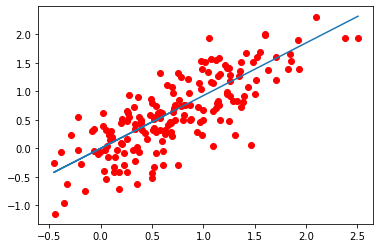

In [54]:

# params = reg.train(x, y, epochs=2, learning_rate=0.000001)
# params = reg.train(x, y, epochs=2, learning_rate=0.1)
params = reg.train(x, y, epochs=50, learning_rate=0.1)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])


<br />

### Segundo caso: Probando con una función exponencial

<br />

In [55]:

def foo(w, b, n):
    x = np.random.rand(n,1).tolist()
    # y = np.power(2, (w*x)) + b
    y = list(map(lambda item: pow(item[0]*w, 2)+b, x))
    return x, y

x, y = foo(9, 3, 2500)


<ipython-input-51-97c0f03cc6d0>:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.parameter_cache.append(np.array((self.W,self.b)))
[60.025806413933964] 0.5967697464223729


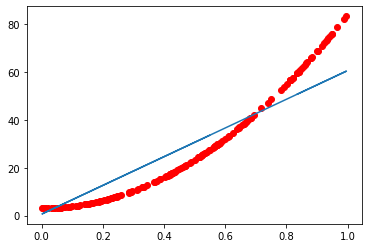

In [56]:

reg = LinearRegression(n_features=1)

params = reg.train(x, y, epochs=90, learning_rate=0.1)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])


<br /><br /><br /><br /><br /><br />
<hr /><hr />

## Usando Pytorch

In [57]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import time

In [58]:

dtype = torch.float
device = torch.device("cpu")
# Uncomment next to run on GPU. Will be until 30x faster.
# device = torch.device("cuda:0") 


In [59]:

class LinearRegression:
    
    def __init__(self, n_features):
        ### PREV -> self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.W = torch.tensor(torch.normal(-1,1,(n_features,1)), dtype=torch.float64) #weights
        ### PREV -> self.b = np.random.rand(1) #intercept
        self.b = torch.randn(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W
        self.b -= learning_rate*delta_b
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        ### PREV -> delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0]
        pre_delta_W_1 = torch.matmul(X, self.W)
        pre_delta_W_2 = ((pre_delta_W_1 + self.b) -Y)
        pre_delta_W_3 = torch.multiply(pre_delta_W_2, X)
        delta_W = torch.sum(pre_delta_W_3) *2/X.shape[0]
        
        #partial derivative of cost w.r.t the intercept
        ### PREV -> delta_b = np.sum( ((np.matmul(X,self.W)+self.b)-Y) )*2/X.shape[0]
        delta_b = torch.sum( ((torch.matmul(X, self.W) + self.b) - Y) ) *2/X.shape[0]

        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        ### PREV -> X = np.array(X).reshape(-1,1)
        X = torch.tensor(X).reshape(-1,1)
        ### PREV -> Y = np.array(Y).reshape(-1,1)
        Y = torch.tensor(Y).reshape(-1,1)

        self.parameter_cache = []       
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            
            ### PREV -> self.parameter_cache.append(np.array((self.W,self.b)))
            self.parameter_cache.append(torch.tensor((self.W,self.b)))
            
        return self.W, self.b, self.parameter_cache

    def predict(self, X):
#         print(X.shape, X.reshape(-1,1).shape)
        ### PREV -> product = np.matmul(torch.tensor(X).reshape(-1,1),self.W)+self.b
        product = torch.matmul(torch.tensor(X).reshape(-1,1),self.W)+self.b
        
        return product

    

In [60]:

#load data from simple csv file
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
#df.head()


In [61]:

x = (df['Weight']-df['Weight'].mean())/df['Weight'].std() #standardization of the dataset
y = (df["Height"]-df['Height'].mean())/df["Height"].std()


tensor([0.9248], dtype=torch.float64) tensor(-1.0228e-09)
<ipython-input-59-80ee166cbaa9>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.W = torch.tensor(torch.normal(-1,1,(n_features,1)), dtype=torch.float64) #weights
<ipython-input-59-80ee166cbaa9>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  product = torch.matmul(torch.tensor(X).reshape(-1,1),self.W)+self.b


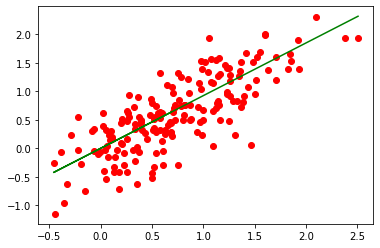

In [62]:

# Finally,
# train and show the predict
#
reg = LinearRegression(n_features=1)
params = reg.train(x, y, epochs=90, learning_rate=0.1)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(torch.tensor(x[:180]))
plt.plot(x[:180], pred[:180], color='green')


<br />

### Segundo caso: Probando con una función exponencial

<br />

In [63]:

# Se crea un dataset
def foo(w, b, n):
    ### PREV -> x = np.random.rand(n,1)
    ### PREV -> y = np.power(2, (w*x)) + b
    x = torch.rand(n,1, dtype=torch.float64)
    y = torch.pow(2, (w*x)) + b 
    
    return x, y

x, y = foo(9, 3, 25000)


tensor([249.9424], dtype=torch.float64) tensor(-35.7058)
<ipython-input-59-80ee166cbaa9>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.W = torch.tensor(torch.normal(-1,1,(n_features,1)), dtype=torch.float64) #weights
<ipython-input-59-80ee166cbaa9>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X).reshape(-1,1)
<ipython-input-59-80ee166cbaa9>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y).reshape(-1,1)


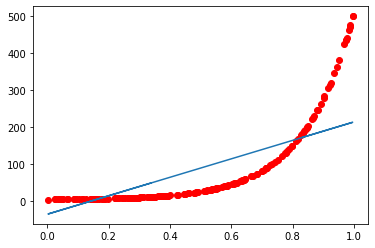

In [64]:

# Finally, again,
# train and show the predict
#
reg = LinearRegression(n_features=1)
params = reg.train(x, y, epochs=90, learning_rate=0.1)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])





--- última línea ---